In [1]:
# Importing Necessary Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading dataset from url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
# prints the first five rows 
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# check how many rows and columns in the dataset
data.shape

(25, 2)

In [5]:
# checks if data has null values or not
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

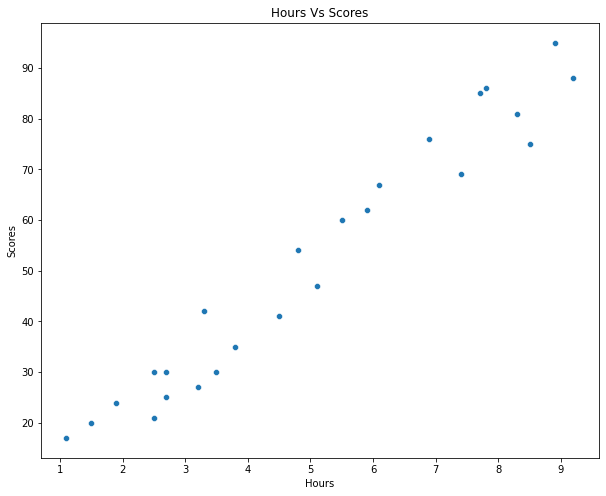

In [6]:
# plotting the distribution of scores
plt.figure(figsize=(10,8))
plt.title("Hours Vs Scores")
sns.scatterplot(data=data, x='Hours', y='Scores');

## Insight
From the above graph , we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing The Data

In [7]:
# seprating dependent and independent features
X = data.drop('Scores', axis=1)
Y = data['Scores']

In [8]:
print(X.head())

   Hours
0    2.5
1    5.1
2    3.2
3    8.5
4    3.5


In [9]:
print(Y.head())

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64


In [10]:
# splitting the data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
print('X :', X.shape)
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)

X : (25, 1)
X_train : (20, 1)
X_test : (5, 1)


## Training The Algorithm

In [12]:
model = LinearRegression()

In [13]:
model.fit(X_train, Y_train)

LinearRegression()

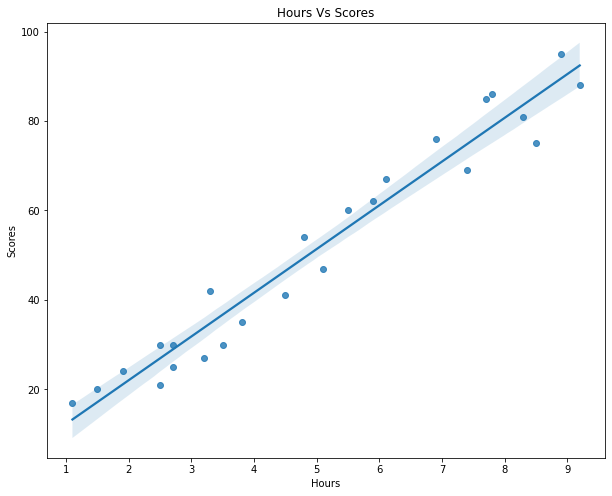

In [14]:
# plotting the regression line
plt.figure(figsize=(10,8))
plt.title("Hours Vs Scores")
sns.regplot(data=data, x='Hours', y='Scores');

In [15]:
print(X_test) # Testing data in hours
y_pred = model.predict(X_test) # predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [16]:
# comparing Actual vs Predicted
dataframe = pd.DataFrame({"Actual" : Y_test, "Precicted" : y_pred})
dataframe

,Actual,Precicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [17]:
# predicted score if a student for 9.25 hrs/day
hours = [[9.25]]
own_pred = model.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535


## Evaluating the model

In [18]:
mae = mean_absolute_error(Y_test, y_pred)
print('Mean Absolute Error :', mae)

Mean Absolute Error : 4.183859899002975
